In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

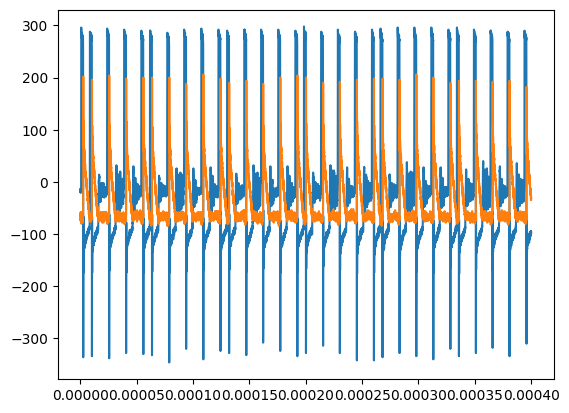

In [7]:
df= pd.read_csv("2025-12-22_12-04-03-749.csv")
Ts = df.Ts .values[0]
Vp = df.CH1.values
Is = df.CH2.values

time = np.arange(0, len(Vp)*Ts, Ts)
plt.plot(time, Vp)
plt.plot(time, 100*Is)


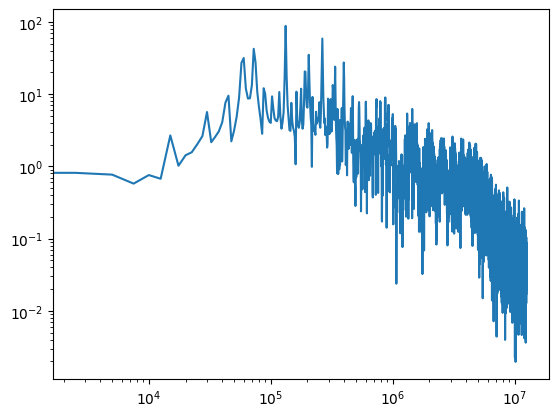

In [8]:
X = np.fft.fft(Vp)
f = np.fft.fftfreq(len(Vp), Ts)

mask = f >= 0
f = f[mask]
X_mag = 2.0 * np.abs(X[mask]) / len(Vp)
plt.plot(f, X_mag)
plt.xscale("log")
plt.yscale("log")

(100000.0, 200000.0)

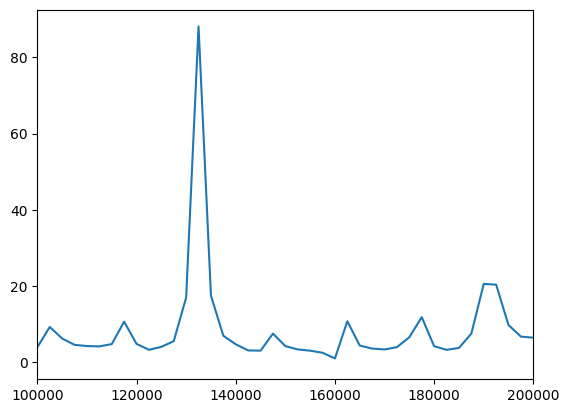

In [11]:
plt.plot(f, X_mag)
#plt.xscale("log")
#plt.yscale("log")
plt.xlim([100e3,200e3])

# Inductance estimation

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

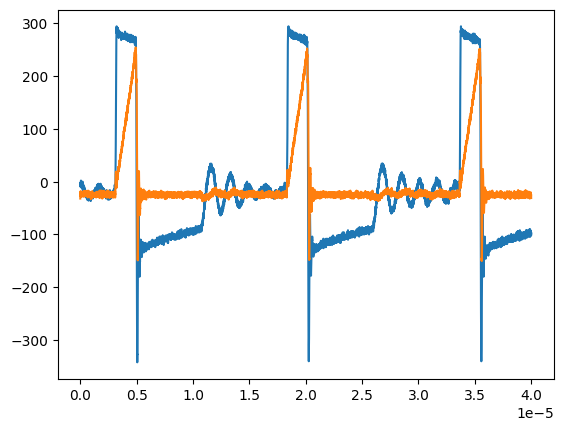

In [2]:
df= pd.read_csv("2025-12-22_11-58-48-583.csv")
Ts = df.Ts .values[0]
Vp = df.CH1.values
Ip = df.CH2.values

time = np.arange(0, len(Vp)*Ts, Ts)
plt.plot(time, Vp)
plt.plot(time, 1000*Ip)


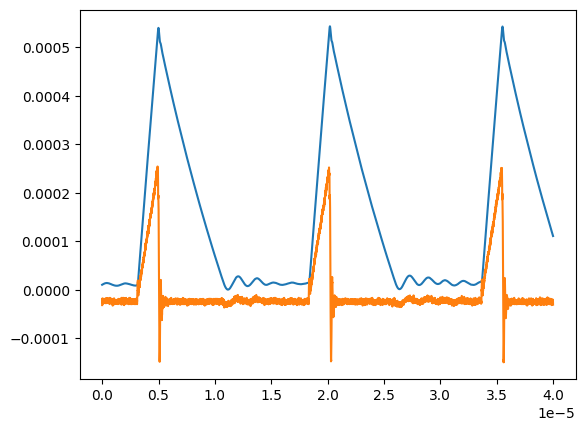

In [8]:
#scipy.integrate.cumtrapz(y, x=None, dx=1.0, axis=-1, initial=None)[source]
import  scipy
integVp = scipy.integrate.cumulative_trapezoid(y= Vp, dx=Ts,initial=0)
a= 19
integVp =integVp +a*time
integVp=integVp-integVp.min()
plt.plot(time, integVp )
plt.plot(time, Ip*1e-3)

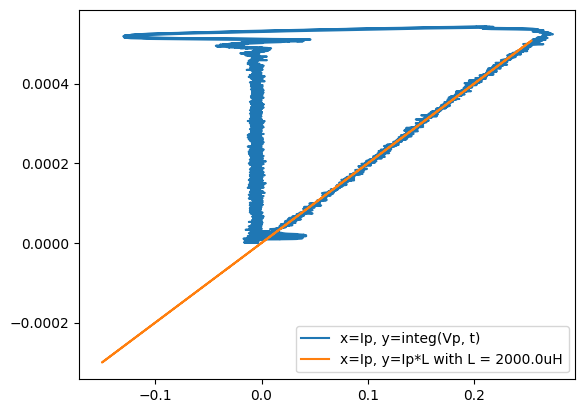

In [15]:
plt.plot(Ip+0.02, integVp,label =  "x=Ip, y=integ(Vp, t)")
L = 2000e-6
# v = L di/dt
# L i = integ(v,t)
plt.plot(Ip, Ip*L,label =  f"x=Ip, y=Ip*L with L = {1e6*L}uH")
plt.legend()